### Setup

The cell below is for setup, in the full version this will be cleaned away so students won't see it. Scroll down to see the actual workbook below.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches
from random import random

class Square(object):
    def __init__(self):
        self.width = 1
        self.height = 1
        self.left = 0
        self.bottom = 0
        self.color = "C0"
        self.transparency = 0.3
        
    def contains(self, x, y):
        left = self.left
        right = left + self.width
        bottom = self.bottom
        top = bottom + self.height
        if left < x < right and bottom < y < top:
            return True
        else:
            return False
        
    def draw(self, ax):
        patch = matplotlib.patches.Rectangle(
            (self.left, self.bottom),
            self.width,
            self.height,
            alpha=self.transparency,
            color=self.color,
            zorder=-1000
        )
        ax.add_patch(patch)
        return ax
    
class Circle(object):
    def __init__(self):
        self.centrex = 0.5
        self.centrey = 0.5
        self.diameter = 1
        self.radius = self.diameter / 2
        self.color = "C1"
        self.transparency = 0.3
        
    def contains(self, x, y):
        xp = x - self.centrex
        yp = y - self.centrey
        if xp ** 2 + yp ** 2 < self.radius ** 2:
            return True
        else:
            return False
      
    def draw(self, ax):
        patch = matplotlib.patches.Circle(
            (self.centrex, self.centrey),
            self.radius,
            alpha=self.transparency,
            color=self.color,
            zorder=-100
        )
        ax.add_patch(patch)
        return ax
    
def draw_square_and_circle(square, circle):
    fig, ax = plt.subplots()
    square.draw(ax)
    circle.draw(ax)
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    ax.set_aspect("equal")
    return fig, ax

square = Square()
circle = Circle()

%matplotlib notebook

# Calculating $\pi$ with random numbers

In this exersize, we are going to estimate the mathematical constant [$\pi$](https://en.wikipedia.org/wiki/Pi)  using **random numbers**! First, we'll talk about random numbers are, then we'll talk about where $\pi$ comes from, then we'll estimate it!

## Random numbers

Random numbers help is to simulate the world around us: from random fluctuations in the temperature to the shimmering lights from stars. 

### How do we simulate random numbers with Python?

We simulate random numbers using the `random` function. First, let's import it:

In [2]:
# Import the "random" functions from the "random module". Note, the random module also has lots of other useful functions!
from random import random

Okay, so let's find out what the `random` function does. 

**Execute the code below by pressing the play button or putting your cursor in the box and hitting Ctrl + Enter**

In [3]:
random()

0.9642996309340963

If you execute the code above a few times, you'll see that it produces random numbers between 0 and 1. 

### How do we save these random numbers? 

To save the output from a function, we can assign it. Let's draw a random number using the `random()` function and store it in a variable:

In [5]:
variable = random()

Now, the random number has been stored as `variable`, to see what it is, we can `print()` it!

In [6]:
print(variable)

0.9015823935511149


### How do we save lots of random numbers?

We are going to need lots of random numbers. We don't really want to have lots of variables. Instead, we can save them to a `list()`!

Let's repeat the code above 1000 times and store the random numbers in a list:

In [7]:
# Create an empty list to store our results
random_numbers = []

for ii in range(50):
    # The append method saves the output of random() in the list random_numbers
    random_numbers.append(random())

Okay, now let's check what the output looks like. Again, we will `print` the output:

In [8]:
print(random_numbers)

[0.11896692532346254, 0.06306590706579773, 0.21348342513854557, 0.749991398860003, 0.7995249989312241, 0.1818049947864141, 0.6261329147884912, 0.4530051066480817, 0.3536422073304232, 0.6811048975911529, 0.8778615986112491, 0.7123062964764678, 0.5854284655574582, 0.7449901627437219, 0.07948181772184659, 0.44858754144389923, 0.24892681947587703, 0.4551908668809328, 0.7849789717204476, 0.44192925698025187, 0.8845879940319379, 0.1273415919343761, 0.617380396914773, 0.8449671848891231, 0.023727707631448713, 0.9340235868068043, 0.00710962581759822, 0.20192660003747687, 0.8266468861419746, 0.6442877120210171, 0.07464992626705214, 0.9074020503678134, 0.44280878283606295, 0.5030683742925213, 0.2021532439435424, 0.6108720192210798, 0.7146679983997981, 0.7386528304288561, 0.7240746442882846, 0.6657668574158226, 0.6102847854958084, 0.748685641738208, 0.8396554007849925, 0.07613174674558676, 0.3826903699594819, 0.2969047923526158, 0.5847028434795468, 0.6576467843293666, 0.5296533431256701, 0.627213

Okay, that is a lot of random numbers!

## Talking about $\pi$

The area of a circle of diameter $d=1$ is:

$$ A_{\rm circle} = \pi \left(\frac{d}{2}\right)^{2} $$

The area of a square of side $d$ is:
$$ A_{\rm square} = d^{2}$$

Let's place a circle of diameter $1$ inside of a square $1$. The code below will draw these shapes

<IPython.core.display.Javascript object>


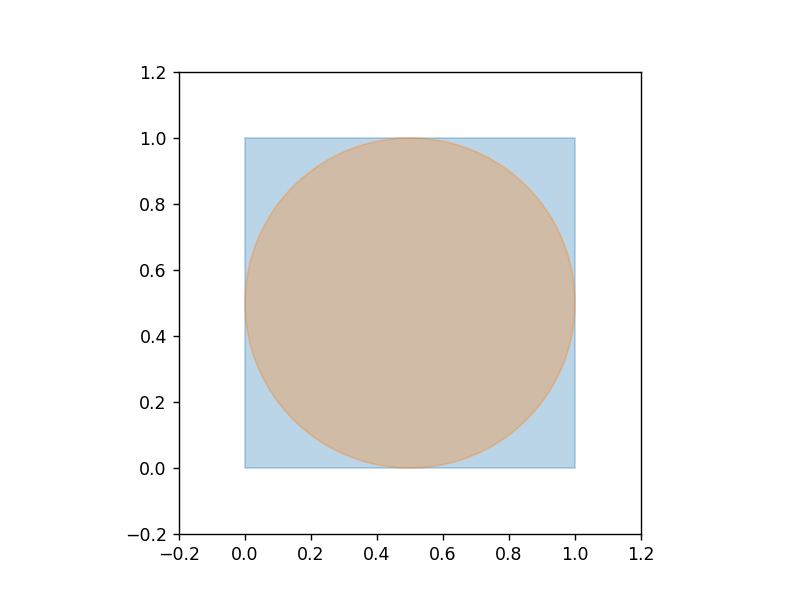

In [10]:
fig, ax = draw_square_and_circle(square, circle)
fig.show()

If we divide the area of the circle by the area of the square:

$$ \frac{A_{\rm circle}}{A_{\rm square}} = \frac{\pi}{4} $$

In other words, the area of the blue + orange space in the figure above divided by the area of just the orange space is $\pi / 4$.

## Using random numbers to estimate $\pi$

Now, we are going to use random numbers to estimate the value of $\pi$. To do this, we'll draw random numbers which either
- Fall inside the circle
- Do not fall inside the circle, but do fall inside the square

The program below draws 100 points and checks if they are inside or outside the circle

<IPython.core.display.Javascript object>


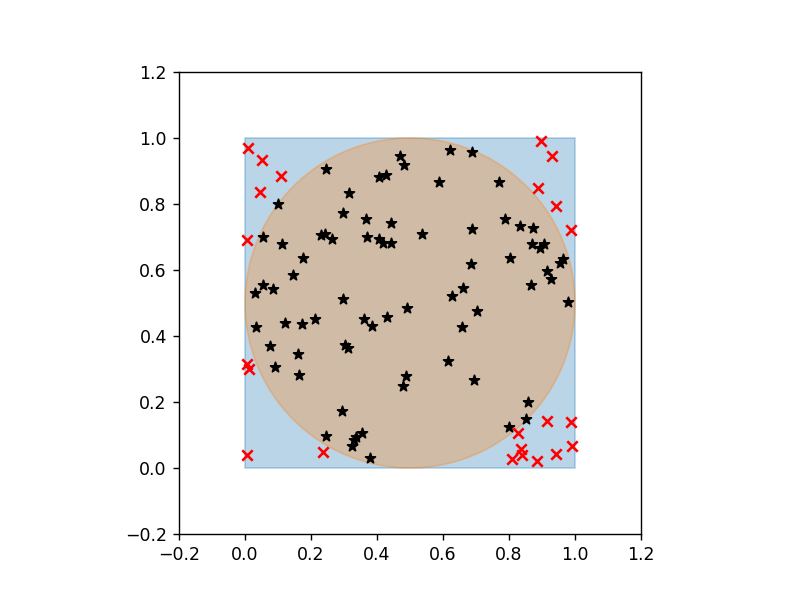

In [16]:
# Draw the square and circle
fig, ax = draw_square_and_circle(square, circle)

# Draw 100 random points
for ii in range(100):
    xpoint = random()
    ypoint = random()
    if circle.contains(xpoint, ypoint):
        # If the point falls inside the cicle, draw it as a black star
        ax.scatter(xpoint, ypoint, color='k', marker='*')
    else:
        # If the point falls outside the cicle, draw it as a red cross
        ax.scatter(xpoint, ypoint, color='red', marker='x')
          
fig.show()

In [23]:
# Total number of random points to draw
N = 10000

inside = 0
outside = 0
for ii in range(N):
    xpoint = random()
    ypoint = random()
    if circle.contains(xpoint, ypoint):
        inside = inside + 1
    else:
        outside = outside + 1
          
fig.show()

pi_estimate = 4 * inside / (inside + outside)
print("I estimate pi to be", pi_estimate)

I estimate pi to be 3.1632
